# Deep3D: Automatic 2D-to-3D Video Conversion with CNNs

Since the debut of Avatar in 2008, 3D movies has rapidly developed into mainstream technology. Roughly 10 to 20 3D movies are produced each year. The launch of Oculus Rift and other VR head set is only going to drive up the demand.

Producing 3D movies, however, is still hard. There are two ways of doing this, and in practice they are about equally popular. Shooting with a special 3D camera or shooting in 2D and manually convert to 3D. But 3D cameras are expensive and unwieldy while manual conversion involves an army of "depth artists" who sit there and draw depth maps for each frame.

Wouldn't it be cool if 2D-to-3D conversion can be done automatically, if you can take a 3D selfie with an ordinary phone? This notebook shows you exactly how to do that.

## Setup

First we'll need to set up the mxnet environment and import the other modules

In [1]:
# setup environment
%matplotlib inline
import mxnet as mx
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from images2gif import writeGif
import logging
logging.basicConfig(level=logging.DEBUG)

In [2]:
model = mx.model.FeedForward.load('deep3d', 50, mx.gpu(0))

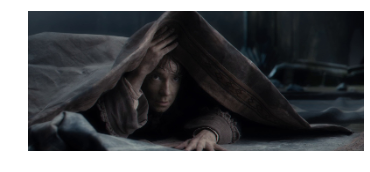

In [5]:
# import urllib
# urllib.urlretrieve('url/to/image.jpg', 'demo.jpg')

shape = (384, 160)
img = cv2.imread('0007_0.jpg')
raw_shape = (img.shape[1], img.shape[0])
img = cv2.resize(img, shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [8]:
X = img.astype(np.float32).transpose((2,0,1))
X = X.reshape((1,)+X.shape)
test_iter = mx.io.NDArrayIter({'left': X, 'left0':X})
Y = model.predict(test_iter)

right = np.clip(Y.squeeze().transpose((1,2,0)), 0, 255).astype(np.uint8)
right = Image.fromarray(cv2.cvtColor(right, cv2.COLOR_BGR2RGB))
left = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
writeGif('demo.gif', [left, right], duration=0.3)

Click [here](../files/demo.gif) to see results.